In [2]:
import pandas as pd
X_train=pd.read_csv("X_train_smote.csv")
X_train.shape

(182, 12)

In [3]:
X_test=pd.read_csv("X_test_rfe.csv")
X_test.shape

(35, 12)

In [4]:
y_train=pd.read_csv("y_train_smote.csv")
y_train.shape

(182, 1)

In [5]:
y_test=pd.read_csv("y_test.csv")
y_test.shape

(35, 1)

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.preprocessing import StandardScaler

In [7]:
svm=SVC()
svm.fit(X_train,y_train.to_numpy().ravel())
y_train_pred=svm.predict(X_train)
y_test_pred=svm.predict(X_test)
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))

0.5824175824175825
0.4857142857142857


In [8]:
scaler = StandardScaler()

In [9]:
X_train_std = scaler.fit_transform(X_train)

In [10]:
X_test_std = scaler.transform(X_test)

In [11]:
svm = SVC()
svm.fit(X_train_std, y_train.to_numpy().ravel())

SVC()

In [12]:
y_train_pred=svm.predict(X_train_std)

In [13]:
y_test_pred=svm.predict(X_test_std)

In [14]:
accuracy_score(y_train_pred,y_train)

0.8351648351648352

In [15]:
accuracy_score(y_test_pred,y_test)
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
params = [
            {
                'kernel': ['sigmoid'],
                'C': [0.01, 0.1,0.5, 1],
            },
            {
                'kernel': ['rbf'],
                'C': [0.01, 0.1,0.5],
                'gamma':[0.1,1,10]
            },
            {
                'kernel': ['poly'],
                'C': [0.01, 0.1,0.5,1],
                'degree': [2,3,4],
                'coef0': [0.0]
            }
         ]

In [17]:
from sklearn.model_selection import GridSearchCV

# SVM na balansiranim i skaliranim podacima

In [18]:
model=GridSearchCV(SVC(),param_grid=params,cv=5,scoring='accuracy')

In [19]:
model.fit(X_train_std,y_train.to_numpy().ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 0.5, 1], 'kernel': ['sigmoid']},
                         {'C': [0.01, 0.1, 0.5], 'gamma': [0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 0.5, 1], 'coef0': [0.0],
                          'degree': [2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [20]:
model.best_estimator_

SVC(C=0.5, gamma=0.1)

In [21]:
model.best_score_

0.7205705705705705

In [22]:
model.best_params_

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [23]:
y_pred_test=model.best_estimator_.predict(X_test_std)

In [24]:
accuracy_score(y_pred_test,y_test)

0.7142857142857143

In [25]:
model=SVC(kernel='rbf',C=0.5,gamma=0.1)
model.fit(X_train_std,y_train.to_numpy().ravel())
y_train_pred=model.predict(X_train_std)
y_test_pred=model.predict(X_test_std)
#c=0.5 gama=0.01 -> 0.67 0.63 0.7 0.52

In [26]:
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))
f1_toxic = f1_score(y_test, y_test_pred, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_test_pred, pos_label="NonToxic")
print(f1_nontoxic)
print(f1_toxic)

0.8406593406593407
0.7142857142857143
0.8076923076923077
0.4444444444444444


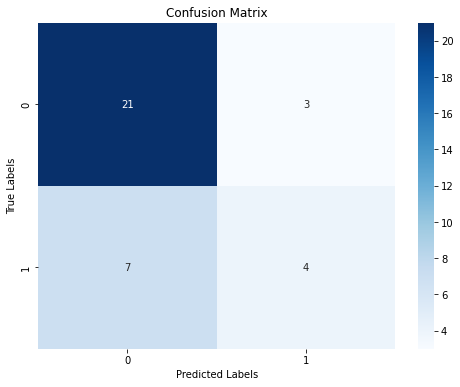

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion = confusion_matrix(y_test, y_test_pred)

# Vizualizacija matrice konfuzije koristeći seaborn biblioteku
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('svm_conf.png')
plt.show()

# SVM na nebalansiranim podacima


In [28]:
X_train=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/X_train_rfe.csv')
X_test=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/X_test_rfe.csv')
y_train=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/y_train.csv')
y_test=pd.read_csv('C:/Users/KORISNIK/Desktop/za fakultet/ToxicityOfMolecules/y_test.csv')

In [29]:
scaler = StandardScaler()

In [30]:
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [31]:
model=GridSearchCV(SVC(),param_grid=params,cv=5,scoring='accuracy')
model.fit(X_train_std,y_train.to_numpy().ravel())

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 0.5, 1], 'kernel': ['sigmoid']},
                         {'C': [0.01, 0.1, 0.5], 'gamma': [0.1, 1, 10],
                          'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 0.5, 1], 'coef0': [0.0],
                          'degree': [2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [32]:
model.best_params_

{'C': 0.5, 'gamma': 0.1, 'kernel': 'rbf'}

In [33]:
model=SVC(kernel='rbf',C=0.5,gamma=0.1)
model.fit(X_train_std,y_train.to_numpy().ravel())
y_train_pred=model.predict(X_train_std)
y_test_pred=model.predict(X_test_std)

In [34]:
print(accuracy_score(y_train_pred,y_train))
print(accuracy_score(y_test_pred,y_test))
f1_toxic = f1_score(y_test, y_test_pred, pos_label="Toxic")
f1_nontoxic = f1_score(y_test, y_test_pred, pos_label="NonToxic")
print(f1_nontoxic)
print(f1_toxic)

0.7352941176470589
0.6571428571428571
0.7931034482758621
0.0


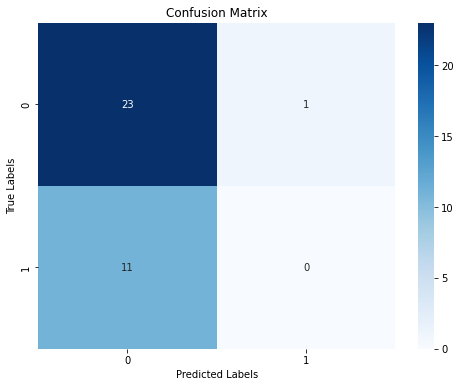

In [35]:
confusion = confusion_matrix(y_test, y_test_pred)

# Vizualizacija matrice konfuzije koristeći seaborn biblioteku
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()